In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Data Loading & Understanding 

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Exploratory Data Analysis 

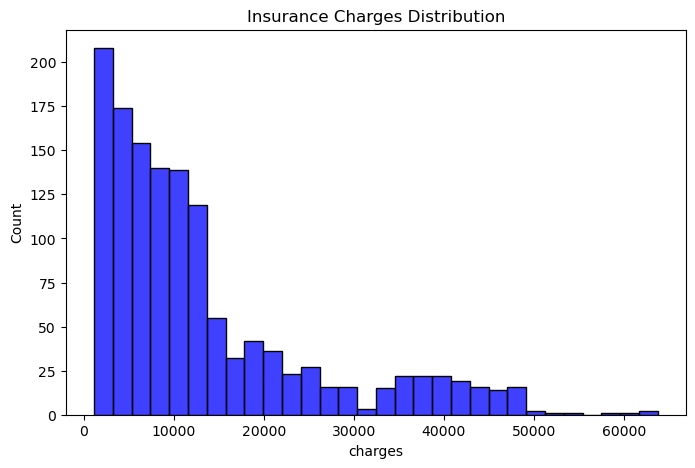

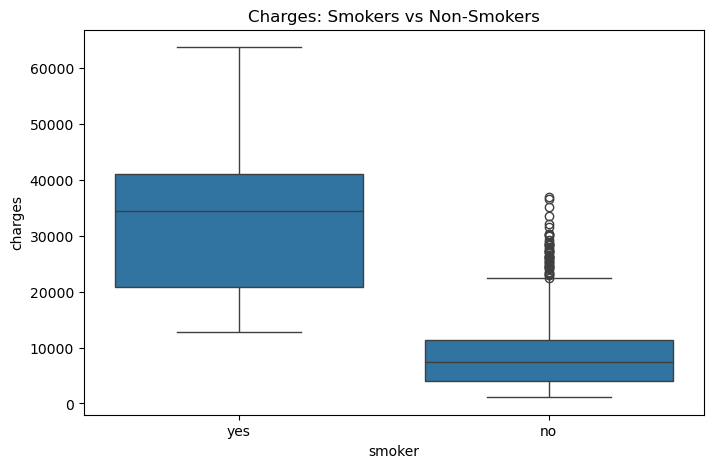

In [6]:
#charges distributed
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'],color='blue')
plt.title('Insurance Charges Distribution')
plt.savefig('distribution.png')

#smoking affect cost
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges: Smokers vs Non-Smokers')
plt.savefig('smoking_impact.png')

Data Preparation 

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
IQR = q3 + (1.5 * iqr)


Manual Regression
slope(w): 393.8730307973952
intercept(b): 1192.9372089611516


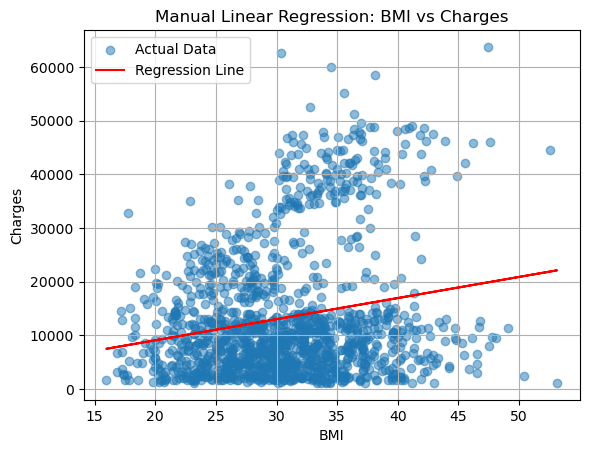

Library slope: 393.8730307973953
Library intercept: 1192.937208961148


In [17]:
x = df['bmi'].values
y = df['charges'].values

x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

w = numerator / denominator  # Slope
b = y_mean - w * x_mean       # Intercept
y_pred = w * x + b            # Predictions

print("\nManual Regression")
print("slope(w):", w)
print("intercept(b):", b)

# Plotting the manual results
plt.scatter(x, y, alpha=0.5, label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Manual Linear Regression: BMI vs Charges')
plt.legend()
plt.grid(True)
plt.show()

model_lib = LinearRegression()
model_lib.fit(df[['bmi']], df['charges'])
print("Library slope:", model_lib.coef_[0])
print("Library intercept:", model_lib.intercept_)

def get_performance(data, label):
    # Convert categorical text into numbers (dummies)
    data_encoded = pd.get_dummies(data, drop_first=True)
    X = data_encoded.drop('charges', axis=1)
    y = data_encoded['charges']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
